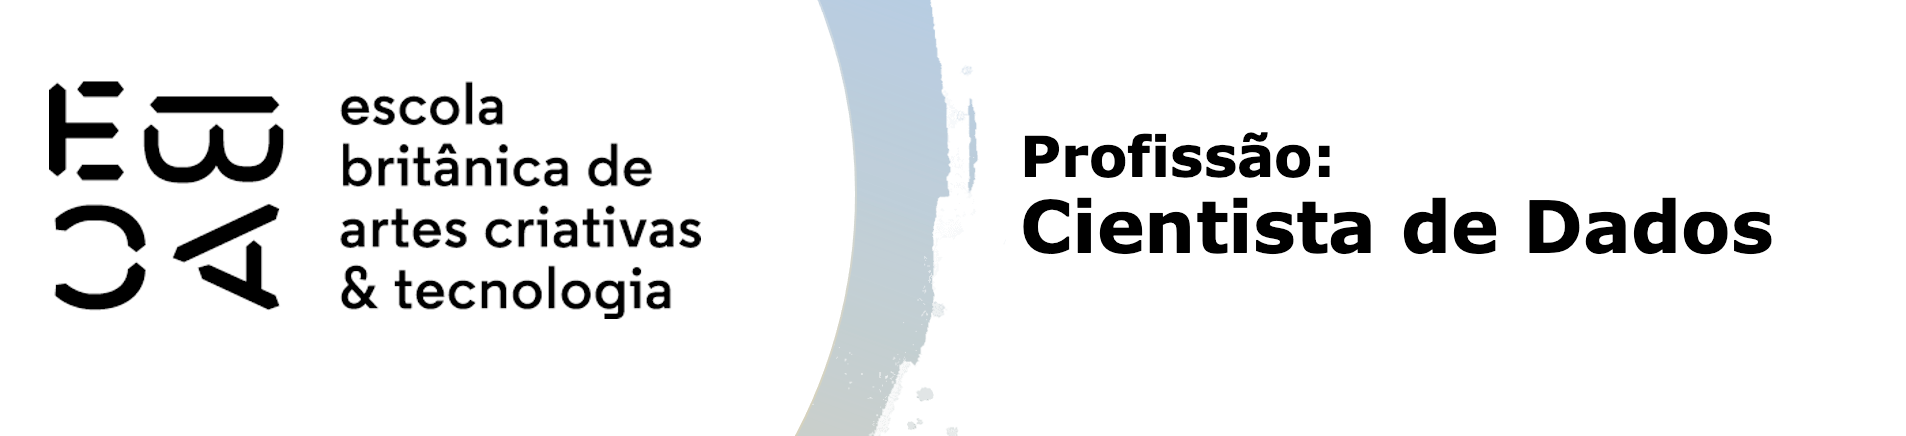

# Tarefa

Com base na tarefa realizada no módulo anterior, vamos fazer um diagnóstico do modelo.

Carregue a base ```previsao_de_renda2.csv```. Separe em uma base de treino e uma base de teste.

Vamos resgatar a melhor versão do modelod e previsão de renda que você fez para esta base. 

- Substitua missings pela média
- Rode novamente o modelo na base de treino (ou desenvolva-o caso não tenha o registro guardado). 

Este modelo deve prever a variável ```renda``` com base nas demais variáveis exceto ```data_ref``` e ```index```. Já vimos que a variável renda é melhor modelada com a transformação ```log()```, não se esqueça disso.

In [19]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.graphics.tsaplots as tsaplots
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('previsao_de_renda_II.csv')
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
1,2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2,2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
3,2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
4,2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


In [33]:
df.isnull().sum()

data_ref                 0
index                    0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64

In [21]:
df.fillna(df['tempo_emprego'].mean(), inplace=True)

In [22]:
X = df.drop('renda', axis=1)
y = df['renda']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1993)

df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)


In [23]:
modelo = smf.ols(formula='''np.log(renda) ~  sexo 
                                    + posse_de_veiculo 
                                    + posse_de_imovel 
                                    + qtd_filhos 
                                    + tipo_renda 
                                    + educacao
                                    + estado_civil
                                    + tipo_residencia
                                    + idade
                                    + tempo_emprego 
                                    + qt_pessoas_residencia''', 
                  data=df_train).fit()

modelo.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                 1.625e+04
Date:                Thu, 15 Aug 2024   Prob (F-statistic):               0.00
Time:                        16:17:16   Log-Likelihood:            -8.5124e+05
No. Observations:              600000   AIC:                         1.703e+06
Df Residuals:                  599975   BIC:                         1.703e+06
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            7.4016      0.052    141.831      0.000       7.299       7.504
sexo[T.M]                            0.1266      0.003     41.525      0.000       0.121       0.133
posse_de_veiculo[T.S]                0.0152      0.003      5.240      0.000       0.010       0.021
posse_de_imovel[T.S]                 0.1888      0.003     66.575      0.000       0.183       0.194
tipo_renda[T.Bolsista]              -0.1625      0.057     -2.865      0.004      -0.274      -0.051
tipo_renda[T.Empresário]             0.1547      0.003     47.288      0.000       0.148       0.161
tipo_renda[T.Pensionista]           -0.2965      0.005    -63.534      0.000      -0.306      -0.287
tipo_renda[T.Servidor público]       0.1488      0.005     30.908      0.000       0.139       0.158
educacao[T.Médio]                    0.0529      0.012      4.304      0.000       0.029       0.077
educacao[T.Pós graduação]            0.1074      0.041      2.589      0.010       0.026       0.189
educacao[T.Superior completo]        0.0443      0.012      3.574      0.000       0.020       0.069
educacao[T.Superior incompleto]      0.0346      0.014      2.495      0.013       0.007       0.062
estado_civil[T.Separado]             0.1894      0.025      7.515      0.000       0.140       0.239
estado_civil[T.Solteiro]             0.1671      0.025      6.760      0.000       0.119       0.216
estado_civil[T.União]                0.0041      0.005      0.837      0.403      -0.006       0.014
estado_civil[T.Viúvo]                0.1691      0.025      6.637      0.000       0.119       0.219
tipo_residencia[T.Casa]             -0.0641      0.011     -5.790      0.000      -0.086      -0.042
tipo_residencia[T.Com os pais]      -0.0304      0.013     -2.424      0.015      -0.055      -0.006
tipo_residencia[T.Comunitário]      -0.1044      0.022     -4.672      0.000      -0.148      -0.061
tipo_residencia[T.Estúdio]          -0.0976      0.019     -5.204      0.000      -0.134      -0.061
tipo_residencia[T.Governamental]    -0.0756      0.013     -5.727      0.000      -0.101      -0.050
qtd_filhos                          -0.1530      0.025     -6.217      0.000      -0.201      -0.105
idade                                0.0036      0.000     21.501      0.000       0.003       0.004
tempo_emprego                        0.1290      0.000    566.804      0.000       0.129       0.129
qt_pessoas_residencia                0.1588      0.025      6.465      0.000       0.111       0.207
==============================================================================
Omnibus:                     3224.137   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2317.572
Skew:             

## Verifique as suposições do modelo

Faça uma análise para avaliar as suposições básicas:

- Os resíduos desse modelo possuem distribuição Normal (ou algo próximo)?
- Verifique a independência dos resíduos
    - Faça um gráfico dos resíduos versus os valores preditos
    - Avalie se há padrões dos resíduos versus cada uma das variáveis do modelo
    - Avalie se o valor médio dos resíduos aparenta ter relação com o mês de referência
- Avalie se a variância da variável resposta parece ser conforme os valores previstos.

Você considera que as suposições estão atendidas? Há algum impacto em eventuais desvios?

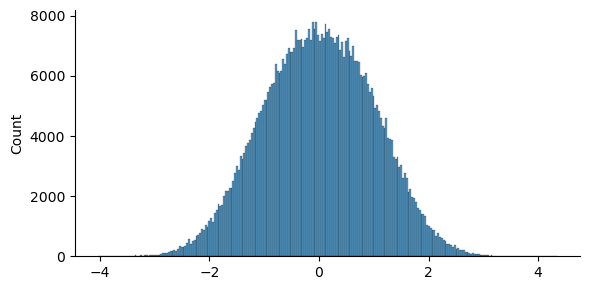

In [24]:
sns.displot(modelo.resid, height=3, aspect=2);

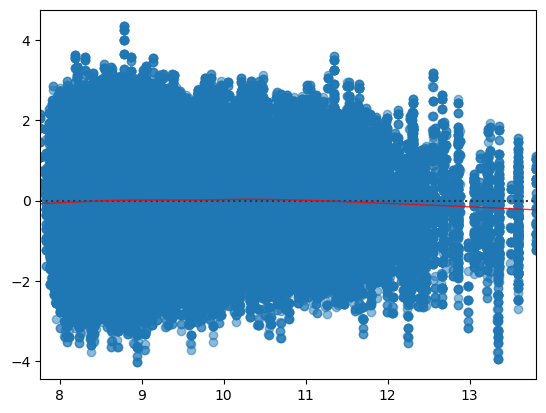

In [25]:
sns.residplot(x=modelo.predict(), y=modelo.resid , data=df, lowess=True, 
                     scatter_kws={'alpha': 0.5}, 
                     line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});

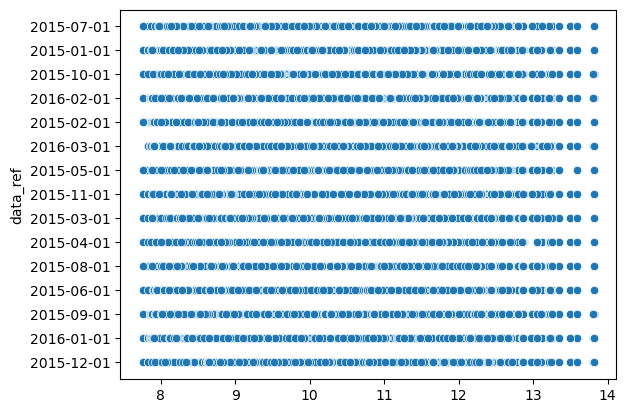

In [26]:
sns.scatterplot(x = modelo.predict(), y = 'data_ref', data=df_train);

<Axes: ylabel='None'>

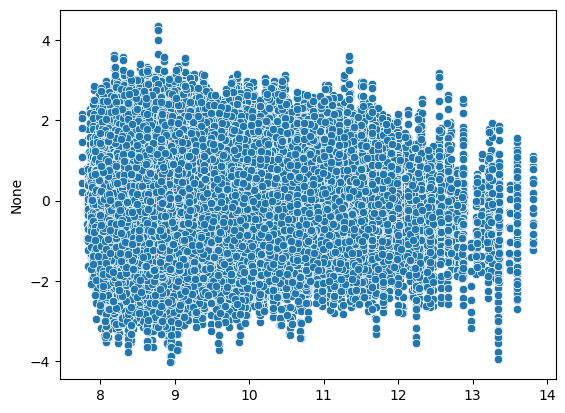

In [27]:
sns.scatterplot(x = modelo.predict(), y = modelo.resid)

## Outliers

Avalie os *studentized residuals*, verifique se há pontos que parecem ser discrepantes.

Avalie se há pontos influentes.

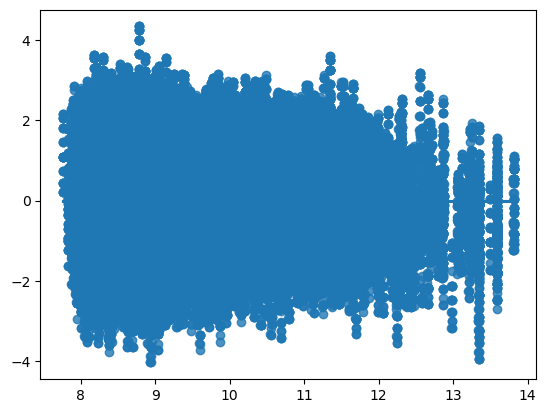

In [28]:
fig, ax = plt.subplots()

sns.regplot(x = modelo.predict(), y=modelo.resid, data=df, ax=ax);

<Axes: ylabel='None'>

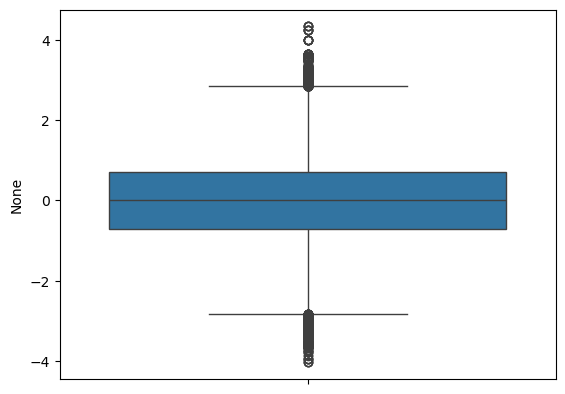

In [29]:
std_res = modelo.resid / np.std(modelo.resid)

sns.boxplot(y=std_res)

Pode-se observar muitos valores discrepantes no resíduo.

KeyboardInterrupt: 

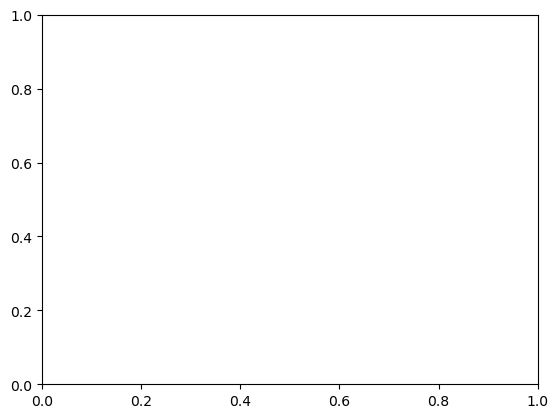

In [58]:
fig = sm.graphics.influence_plot(modelo, criterion="cooks")
fig.tight_layout(pad=1.0)

## Multicolinearidade

Avalie se há questões relacionadas a multicolinearidade através de pelo menos:

- Matriz de correlação de Spearman
- VIF

In [30]:
import scipy.stats as ss 
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [36]:
variaveis = [('sexo', 
             'posse_de_veiculo',
             'posse_de_imovel',
             'qtd_filhos', 
             'tipo_renda',
             'educacao',
             'estado_civil',
             'tipo_residencia',
             'idade', 
             'tempo_emprego',
             'qt_pessoas_residencia')]

In [42]:
df_dum = pd.get_dummies(df, drop_first=True)
df_dum.head()

,index,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,data_ref_2015-02-01,data_ref_2015-03-01,data_ref_2015-04-01,data_ref_2015-05-01,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,5762,0,47,16.717808,2.0,11138.14,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,1279,0,30,9.600000,2.0,2424.81,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
2,14111,0,28,8.208219,2.0,13749.66,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,8189,2,44,1.301370,4.0,2361.84,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,1830,2,33,1.254795,4.0,790.78,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [44]:
# Medidas de associação
df_dum.corr()

,index,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,data_ref_2015-02-01,data_ref_2015-03-01,data_ref_2015-04-01,data_ref_2015-05-01,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
index,1.000000,0.031406,-0.047356,-0.031584,0.032994,-0.011988,-0.000527,-0.000140,0.000951,0.001672,...,-0.015612,-0.019438,0.014762,-0.008367,-0.033837,-0.020988,0.021822,0.008417,0.014304,0.008785
qtd_filhos,0.031406,1.000000,-0.370815,-0.072543,0.890326,-0.036747,-0.000364,0.000844,0.001995,-0.001631,...,0.029666,-0.019057,-0.127695,-0.000649,-0.101798,-0.030858,0.036197,0.001283,0.026811,-0.003820
idade,-0.047356,-0.370815,1.000000,0.251433,-0.341422,0.093459,-0.002739,0.001302,-0.001246,0.001044,...,-0.151236,0.052891,-0.067116,-0.058049,0.223521,0.155982,-0.187269,-0.018598,-0.008012,0.007819
tempo_emprego,-0.031584,-0.072543,0.251433,1.000000,-0.062517,0.458820,-0.000575,0.001736,0.000683,0.000485,...,-0.041629,0.018762,-0.019093,-0.018576,0.024266,0.052651,-0.072921,-0.025614,0.013168,0.018677
qt_pessoas_residencia,0.032994,0.890326,-0.341422,-0.062517,1.000000,-0.041855,-0.000655,0.001736,0.001043,-0.001768,...,0.019716,-0.227063,-0.423678,0.069669,-0.263957,-0.015963,0.025455,0.002050,0.024093,-0.008080
renda,-0.011988,-0.036747,0.093459,0.458820,-0.041855,1.000000,-0.035024,-0.017644,0.006050,0.033739,...,-0.004043,0.012480,0.025379,-0.008473,-0.002080,0.023276,-0.025323,-0.007015,0.001604,-0.001506
data_ref_2015-02-01,-0.000527,-0.000364,-0.002739,-0.000575,-0.000655,-0.035024,1.000000,-0.071429,-0.071429,-0.071429,...,0.002888,0.000595,0.001058,0.000586,-0.000602,0.001100,0.000002,-0.000216,0.002549,-0.001176
data_ref_2015-03-01,-0.000140,0.000844,0.001302,0.001736,0.001736,-0.017644,-0.071429,1.000000,-0.071429,-0.071429,...,-0.002194,-0.001093,-0.002188,0.000506,-0.000069,0.000409,0.000702,0.002943,-0.001672,-0.000624
data_ref_2015-04-01,0.000951,0.001995,-0.001246,0.000683,0.001043,0.006050,-0.071429,-0.071429,1.000000,-0.071429,...,0.001789,0.000248,0.000161,-0.001656,0.001955,0.000001,0.001169,0.000027,-0.000916,-0.000501
data_ref_2015-05-01,0.001672,-0.001631,0.001044,0.000485,-0.001768,0.033739,-0.071429,-0.071429,-0.071429,1.000000,...,-0.000711,0.000086,-0.000214,-0.000235,0.002275,0.000125,-0.000699,0.002295,-0.000853,0.000327


In [45]:
# Correlação de Spearman
df_dum.corr(method='spearman')

,index,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,data_ref_2015-02-01,data_ref_2015-03-01,data_ref_2015-04-01,data_ref_2015-05-01,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
index,1.000000,0.028806,-0.046462,-0.030095,0.031365,-0.018925,-0.000525,-0.000139,0.000948,0.001675,...,-0.015616,-0.019421,0.014778,-0.008355,-0.033827,-0.020959,0.021815,0.008397,0.014303,0.008770
qtd_filhos,0.028806,1.000000,-0.415151,-0.089260,0.828600,-0.019957,-0.000074,0.000943,0.001610,-0.001685,...,0.035905,-0.011660,-0.129928,0.011926,-0.110355,-0.044221,0.043468,-0.006703,0.036230,0.003364
idade,-0.046462,-0.415151,1.000000,0.300547,-0.350006,0.107999,-0.002640,0.001211,-0.001234,0.001107,...,-0.154209,0.057186,-0.069353,-0.057369,0.214403,0.155365,-0.190445,-0.017949,-0.006899,0.011105
tempo_emprego,-0.030095,-0.089260,0.300547,1.000000,-0.058139,0.501354,-0.001207,0.001667,-0.000401,0.002166,...,-0.058476,0.001212,-0.045854,-0.021323,0.050502,0.069683,-0.089319,-0.039824,0.024903,0.007484
qt_pessoas_residencia,0.031365,0.828600,-0.350006,-0.058139,1.000000,-0.008260,-0.000472,0.001954,0.000560,-0.001777,...,0.020628,-0.263756,-0.486828,0.094172,-0.305468,-0.021624,0.026630,-0.003731,0.030513,-0.002589
renda,-0.018925,-0.019957,0.107999,0.501354,-0.008260,1.000000,-0.101436,-0.021620,0.067063,0.143691,...,-0.027892,0.010882,-0.017494,-0.012135,-0.005246,0.033061,-0.040263,-0.016726,0.008651,-0.001235
data_ref_2015-02-01,-0.000525,-0.000074,-0.002640,-0.001207,-0.000472,-0.101436,1.000000,-0.071429,-0.071429,-0.071429,...,0.002888,0.000595,0.001058,0.000586,-0.000602,0.001100,0.000002,-0.000216,0.002549,-0.001176
data_ref_2015-03-01,-0.000139,0.000943,0.001211,0.001667,0.001954,-0.021620,-0.071429,1.000000,-0.071429,-0.071429,...,-0.002194,-0.001093,-0.002188,0.000506,-0.000069,0.000409,0.000702,0.002943,-0.001672,-0.000624
data_ref_2015-04-01,0.000948,0.001610,-0.001234,-0.000401,0.000560,0.067063,-0.071429,-0.071429,1.000000,-0.071429,...,0.001789,0.000248,0.000161,-0.001656,0.001955,0.000001,0.001169,0.000027,-0.000916,-0.000501
data_ref_2015-05-01,0.001675,-0.001685,0.001107,0.002166,-0.001777,0.143691,-0.071429,-0.071429,-0.071429,1.000000,...,-0.000711,0.000086,-0.000214,-0.000235,0.002275,0.000125,-0.000699,0.002295,-0.000853,0.000327


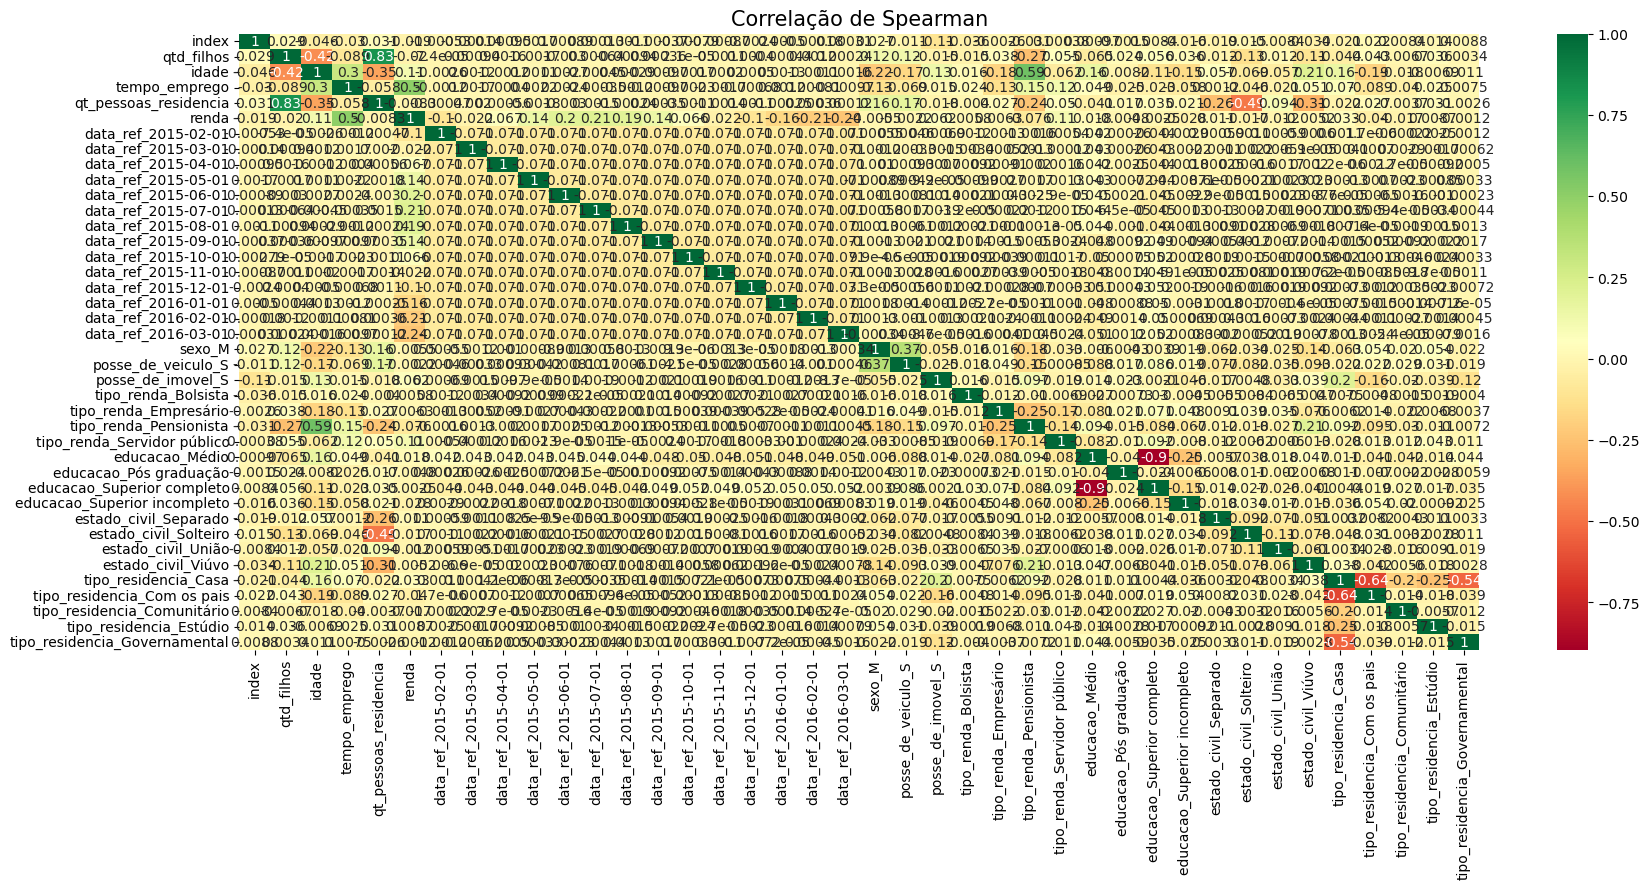

In [52]:
plt.figure(figsize=(20,8))
plt.title('Correlação de Spearman',size=15)
sns.heatmap(df_dum.corr('spearman'), annot = True, cmap= "RdYlGn");

In [ ]:
# Variance inflation factor (VIF)
vif(df_dum.values, 1)
vars_vif = pd.DataFrame()
vars_vif["VIF Factor"] = [vif(df_dum, i) for i in range(df_dum.shape[1])]
vars_vif["Feature"] = df_dum.columns

vars_vif.round(2)

## Ajustes

Faça os ajustes que julgar necessários no modelo e compare as métricas de desempenho do modelo original e ajustado na base de testes.

In [ ]:
# Eliminar a variável com maior VIF